In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df  = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


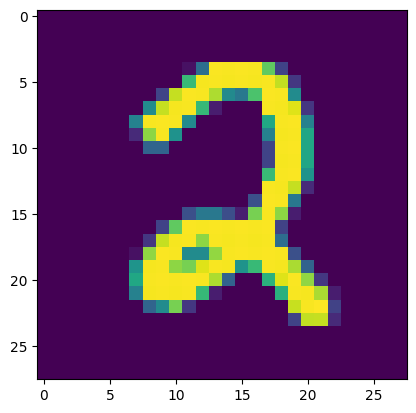

In [5]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1800,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.081326007843018


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [14]:
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [17]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
X_train_pca.shape

(33600, 784)

In [19]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [20]:
y_pred_pca = knn.predict(X_test_pca)
accuracy_score(y_test, y_pred_pca)

0.9391666666666667

In [21]:
# best_param = 0
# best_acc = 0
# for i in range(50, 100):
#     pca = PCA(n_components = i)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
#     knn.fit(X_train_pca, y_train)
#     y_pred_pca = knn.predict(X_test_pca)
#     acc = accuracy_score(y_test, y_pred_pca)
#     print(f'n_components: {i} Accuracy: {acc}')
#     if acc>best_acc:
#         best_acc = acc
#         best_param = i

In [22]:
# best_param

NameError: name 'best_param' is not defined

In [ ]:
# best_acc

In [23]:
#transforming to 2 coordinate system for visualization

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
X_train_pca

array([[-2.71863324, -0.48976483],
       [-0.67691587, -6.75272422],
       [-3.03324402,  6.50947078],
       ...,
       [ 2.14878754,  0.78031419],
       [ 1.05955684,  0.94758349],
       [17.70260971,  1.96213094]])

In [25]:
import plotly.express as px
y_train_pca = y_train.astype(str)
fig = px.scatter(x = X_train_pca[:,0],
                y = X_train_pca[:,1],
                color = y_train_pca,
                color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [26]:
#transforming to 2 coordinate system for visualization

pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
y_train_pca = y_train.astype(str)
fig = px.scatter_3d(x = X_train_pca[:,0],
                y = X_train_pca[:,1],
                z = X_train_pca[:,2],
                color = y_train_pca,
                color_discrete_sequence = px.colors.qualitative.G10)
fig.update_layout(margin = dict(l= 20,r = 20, t=20, b=20))
fig.show()

In [32]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [33]:
#Eigen Values
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [34]:
#eigen vectors
pca.components_

array([[-1.50074992e-19, -0.00000000e+00,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20,  3.46944695e-17,  1.45716772e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -4.16333634e-17,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.68358182e-01, -2.05207738e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -7.56701048e-02,  4.64725306e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -5.84645129e-02,  5.30912651e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [35]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [36]:
pca.components_.shape

(784, 784)

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

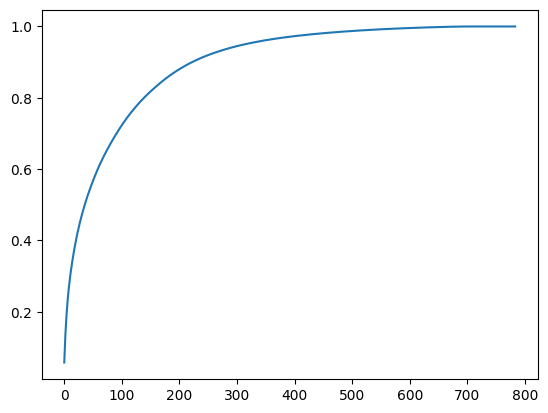

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))